In [2]:
import pandas as pd

In [3]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv')

In [4]:
df_corr = pd.DataFrame(
    [df_answers['1a_corr'].value_counts(), df_answers['1b_corr'].value_counts(), df_answers['2a_corr'].value_counts(), df_answers['2b_corr'].value_counts(), df_answers['3a_corr'].value_counts(), df_answers['3b_corr'].value_counts(),
     ]
).rename(columns={1:'correct', 0: 'incorrect'})

df_corr['task'] = ['1a', '1b', '2a', '2b', '3a', '3b']

df_corr = df_corr.set_index('task')

df_corr['correctness_ratio'] = df_corr['correct'] / (df_corr['correct'] + df_corr['incorrect']) * 100

df_corr

,correct,incorrect,correctness_ratio
task,,,
1a,35,5,87.5
1b,37,3,92.5
2a,28,12,70.0
2b,29,11,72.5
3a,22,18,55.0
3b,18,22,45.0


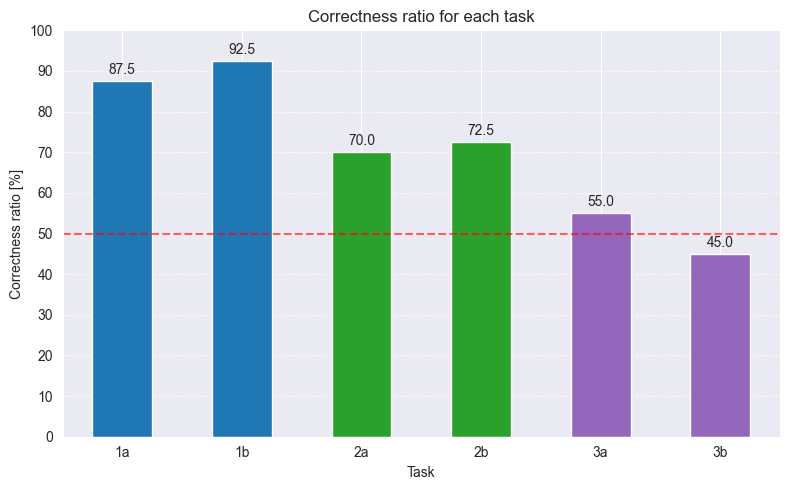

In [23]:
# create plot

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

df_corr['correctness_ratio'].plot(kind='bar', ax=ax, color=['#1f77b4', '#1f77b4', '#2ca02c', '#2ca02c', '#9467bd', '#9467bd'])

ax.set_title('Correctness ratio for each task')
ax.set_xlabel('Task')
ax.set_ylabel('Correctness ratio [%]')

plt.xticks(rotation=0)
plt.yticks(range(0, 101, 10))
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.axhline(y=50, color='r', linestyle='--', alpha=0.6)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 1, f'{round(i.get_height(), 2)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()